In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the data
diabetic_data = pd.read_csv('/content/drive/MyDrive/diabetic_data/diabetic_data.csv')
ids_mapping = pd.read_csv('/content/drive/MyDrive/diabetic_data/IDS_mapping.csv')

print(diabetic_data.head())
print(ids_mapping.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [ ]:
# Data Preprocessing
# Drop columns that won't help in prediction (e.g., unique patient IDs)
diabetic_data.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)

In [ ]:
# Handle missing values
diabetic_data.replace('?', np.nan, inplace=True)
missing_values = diabetic_data.isnull().sum()
missing_columns = missing_values[missing_values > 0].index.tolist()
diabetic_data.drop(columns=missing_columns, inplace=True)

In [ ]:
# Encode categorical variables
categorical_cols = diabetic_data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    diabetic_data[col] = le.fit_transform(diabetic_data[col])

# Split dataset into features and target variable
X = diabetic_data.drop(columns=['readmitted'])
y = diabetic_data['readmitted']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [ ]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

--- Logistic Regression Evaluation ---
Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.01      0.02      2285
           1       0.50      0.24      0.33      7117
           2       0.58      0.90      0.71     10952

    accuracy                           0.57     20354
   macro avg       0.49      0.38      0.35     20354
weighted avg       0.53      0.57      0.50     20354



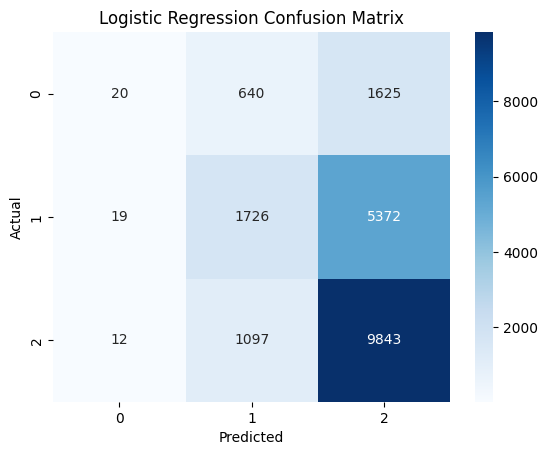

--- Random Forest Evaluation ---
Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.02      0.04      2285
           1       0.48      0.40      0.43      7117
           2       0.61      0.80      0.69     10952

    accuracy                           0.57     20354
   macro avg       0.45      0.40      0.39     20354
weighted avg       0.53      0.57      0.53     20354



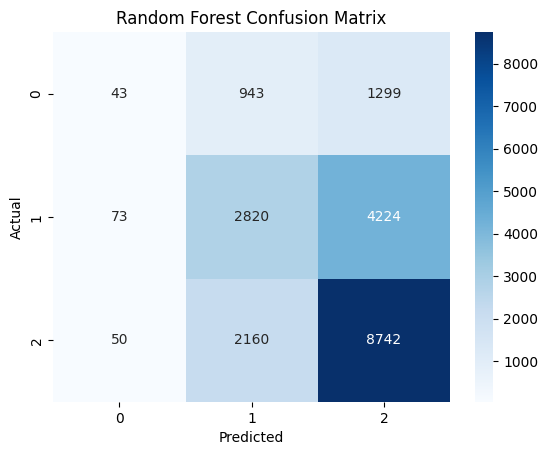

In [ ]:
# Model Evaluation
def evaluate_model(model_name, y_test, y_pred):
    print(f'--- {model_name} Evaluation ---')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate Logistic Regression
evaluate_model('Logistic Regression', y_test, y_pred_logistic)

# Evaluate Random Forest
evaluate_model('Random Forest', y_test, y_pred_rf)

In [ ]:
# Comparing Logistic Regression and Random Forest
print("Logistic Regression vs Random Forest:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression vs Random Forest:
Logistic Regression Accuracy: 0.5693721135894665
Random Forest Accuracy: 0.5701581998624349
